In [1]:
%matplotlib widget
import spectral as spy
import spectral.io.envi as envi

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import japanize_matplotlib

from PIL import Image
import csv
import mplcursors

from scipy.signal import argrelmax

In [2]:
HDR_PATH_iphone = '/data/iphone_blue_200_stegano_2023-08-07_010/results/REFLECTANCE_2023-08-07_010.hdr'
HDR_PATH_pixel = '/data/pixel_blue_200_stegano_2023-08-07_007/results/REFLECTANCE_2023-08-07_007.hdr'
HDR_PATH_huawei = '/data/huawei_blue_200_stegano_2023-08-07_008/results/REFLECTANCE_2023-08-07_008.hdr'

IMG_PATH_iphone = '/data/iphone_blue_200_stegano_2023-08-07_010/results/REFLECTANCE_2023-08-07_010.png'
IMG_PATH_pixel = '/data/pixel_blue_200_stegano_2023-08-07_007/results/REFLECTANCE_2023-08-07_007.png'
IMG_PATH_huawei = '/data/huawei_blue_200_stegano_2023-08-07_008/results/REFLECTANCE_2023-08-07_008.png'

In [3]:
spec_img_i = envi.open(HDR_PATH_iphone)
spec_img_p = envi.open(HDR_PATH_pixel)
spec_img_h = envi.open(HDR_PATH_huawei)

In [4]:
wave_lengthes = []
hdr = envi.read_envi_header(HDR_PATH_iphone)

for wl in hdr['wavelength']:
    wave_lengthes.append(float(wl))

In [5]:
# image_i = Image.open(IMG_PATH_huawei)
# fig_test = plt.figure(figsize=(20,20))
# _ax1 = fig_test.add_subplot(1,1,1)
# _ax1.imshow(image_i)
# mplcursors.cursor(hover=True)

# plt.show()

0.84624845 0.026024096 0.05686854


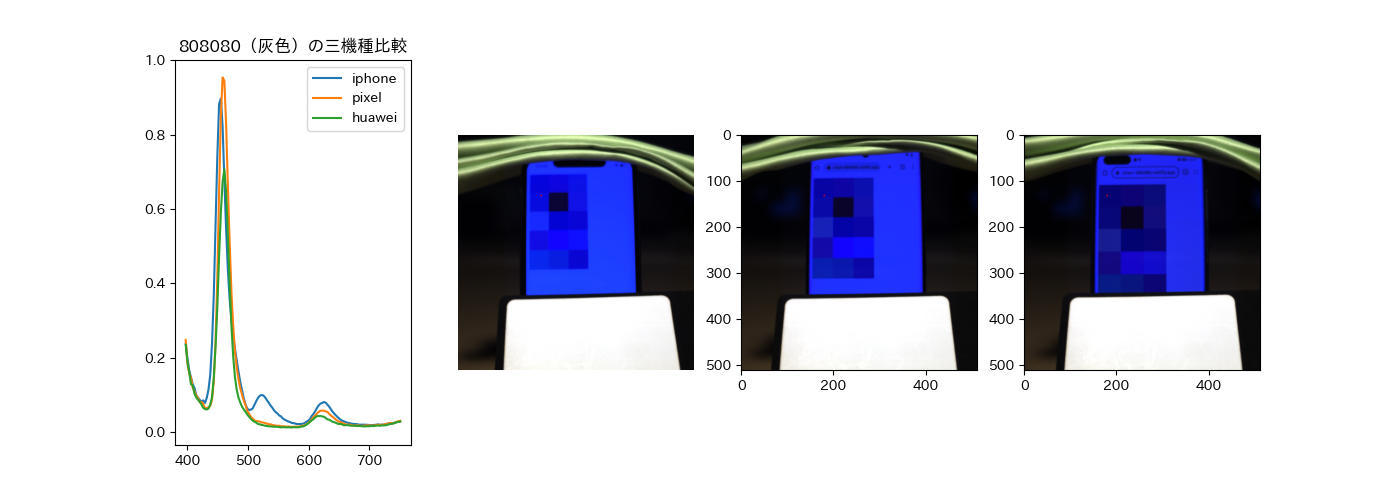

In [6]:
pixel_x = 180 # X座標
pixel_y = 133# Y座標
color = (255, 0, 0)  # 色(RGB値)

dots=[-1,0,1]
image_i = Image.open(IMG_PATH_iphone)
for i in dots:
    for j in dots:
        image_i.putpixel((pixel_x+i, pixel_y+j), color)
        
image_p = Image.open(IMG_PATH_pixel)
for i in dots:
    for j in dots:
        image_p.putpixel((pixel_x+i, pixel_y+j), color)
image_h = Image.open(IMG_PATH_huawei)
for i in dots:
    for j in dots:
        image_h.putpixel((pixel_x+i, pixel_y+j), color)

x = wave_lengthes[:121]
y_i = spec_img_i.read_pixel(512-pixel_x,pixel_y)[:121]
y_p = spec_img_p.read_pixel(512-pixel_x,pixel_y)[:121]
y_h = spec_img_h.read_pixel(512-pixel_x,pixel_y)[:121]

fig = plt.figure(figsize = (14,5))
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)

print(y_p[20],y_p[43],y_p[78])


ax1.plot(x,y_i,label='iphone')
ax1.plot(x,y_p,label='pixel')
ax1.plot(x,y_h,label='huawei')
ax1.set_title('808080（灰色）の三機種比較')
ax1.legend()
ax2.imshow(image_i)
ax2.axis('off')
ax3.imshow(image_p)
ax4.imshow(image_h)
mplcursors.cursor(hover=True)

plt.show()

In [7]:
def correction_i(x,y):
    diff_mean_per_r = 0.00022281961990337746
    diff_mean_per_g = 0.00042275538047154747
    correction_value = 0
    new_x_coords = [158, 196, 238, 280]
    new_y_coords = [89, 128, 169, 208, 251, 292]

# 新しい grid_info
   grid_info = {
        (new_x_coords[0], new_x_coords[1], new_y_coords[0], new_y_coords[1]): int(115/50)*diff_mean_per_r + int(8/50)*diff_mean_per_g,
        (new_x_coords[1], new_x_coords[2], new_y_coords[0], new_y_coords[1]): int(192/50)*diff_mean_per_r + int(23/50)*diff_mean_per_g,
        (new_x_coords[2], new_x_coords[3], new_y_coords[0], new_y_coords[1]): int(149/50)*diff_mean_per_r + int(146/50)*diff_mean_per_g,
        (new_x_coords[0], new_x_coords[1], new_y_coords[1], new_y_coords[2]): int(130/50)*diff_mean_per_r + int(110/50)*diff_mean_per_g,
        (new_x_coords[1], new_x_coords[2], new_y_coords[1], new_y_coords[2]): int(176/50)*diff_mean_per_r + int(29/50)*diff_mean_per_g,
        (new_x_coords[2], new_x_coords[3], new_y_coords[1], new_y_coords[2]): int(213/50)*diff_mean_per_r + int(144/50)*diff_mean_per_g,
        (new_x_coords[0], new_x_coords[1], new_y_coords[2], new_y_coords[3]): int(226/50)*diff_mean_per_r + int(217/50)*diff_mean_per_g,
        (new_x_coords[1], new_x_coords[2], new_y_coords[2], new_y_coords[3]): int(13/50)*diff_mean_per_r + int(14/50)*diff_mean_per_g,
        (new_x_coords[2], new_x_coords[3], new_y_coords[2], new_y_coords[3]): int(151/50)*diff_mean_per_r + int(51/50)*diff_mean_per_g,
        (new_x_coords[0], new_x_coords[1], new_y_coords[3], new_y_coords[4]): int(228/50)*diff_mean_per_r + int(102/50)*diff_mean_per_g,
        (new_x_coords[1], new_x_coords[2], new_y_coords[3], new_y_coords[4]): int(236/50)*diff_mean_per_r + int(2/50)*diff_mean_per_g,
        (new_x_coords[2], new_x_coords[3], new_y_coords[3], new_y_coords[4]): int(198/50)*diff_mean_per_r + int(130/50)*diff_mean_per_g,
        (new_x_coords[0], new_x_coords[1], new_y_coords[4], new_y_coords[5]): int(49/50)*diff_mean_per_r + int(211/50)*diff_mean_per_g,
        (new_x_coords[1], new_x_coords[2], new_y_coords[4], new_y_coords[5]): int(107/50)*diff_mean_per_r + int(183/50)*diff_mean_per_g,
        (new_x_coords[2], new_x_coords[3], new_y_coords[4], new_y_coords[5]): int(164/50)*diff_mean_per_r + int(67/50)*diff_mean_per_g
    }


    for (x_min, x_max, y_min, y_max), value in grid_info.items():
        if (x_min < x and x < x_max and y_min < y and y < y_max) :
            correction_value = value
    
    return correction_value

In [21]:
def correction_i_unit(x,y):
    diff_mean_per_r = 0.0022727596759796144
    diff_mean_per_g = 0.004312104880809784
    correction_value = 0
    new_x_coords = [158, 196, 238, 280]
    new_y_coords = [89, 128, 169, 208, 251, 292]

# 新しい grid_info
    grid_info = {
    (new_x_coords[0], new_x_coords[1], new_y_coords[0], new_y_coords[1]): (115 // 10) * diff_mean_per_r + (8 // 10) * diff_mean_per_g,
    (new_x_coords[1], new_x_coords[2], new_y_coords[0], new_y_coords[1]): (192 // 10) * diff_mean_per_r + (23 // 10) * diff_mean_per_g,
    (new_x_coords[2], new_x_coords[3], new_y_coords[0], new_y_coords[1]): (149 // 10) * diff_mean_per_r + (146 // 10) * diff_mean_per_g,
    (new_x_coords[0], new_x_coords[1], new_y_coords[1], new_y_coords[2]): (130 // 10) * diff_mean_per_r + (110 // 10) * diff_mean_per_g,
    (new_x_coords[1], new_x_coords[2], new_y_coords[1], new_y_coords[2]): (176 // 10) * diff_mean_per_r + (29 // 10) * diff_mean_per_g,
    (new_x_coords[2], new_x_coords[3], new_y_coords[1], new_y_coords[2]): (213 // 10) * diff_mean_per_r + (144 // 10) * diff_mean_per_g,
    (new_x_coords[0], new_x_coords[1], new_y_coords[2], new_y_coords[3]): (226 // 10) * diff_mean_per_r + (217 // 10) * diff_mean_per_g,
    (new_x_coords[1], new_x_coords[2], new_y_coords[2], new_y_coords[3]): (13 // 10) * diff_mean_per_r + (14 // 10) * diff_mean_per_g,
    (new_x_coords[2], new_x_coords[3], new_y_coords[2], new_y_coords[3]): (151 // 10) * diff_mean_per_r + (51 // 10) * diff_mean_per_g,
    (new_x_coords[0], new_x_coords[1], new_y_coords[3], new_y_coords[4]): (228 // 10) * diff_mean_per_r + (102 // 10) * diff_mean_per_g,
    (new_x_coords[1], new_x_coords[2], new_y_coords[3], new_y_coords[4]): (236 // 10) * diff_mean_per_r + (2 // 10) * diff_mean_per_g,
    (new_x_coords[2], new_x_coords[3], new_y_coords[3], new_y_coords[4]): (198 // 10) * diff_mean_per_r + (130 // 10) * diff_mean_per_g,
    (new_x_coords[0], new_x_coords[1], new_y_coords[4], new_y_coords[5]): (49 // 10) * diff_mean_per_r + (211 // 10) * diff_mean_per_g,
    (new_x_coords[1], new_x_coords[2], new_y_coords[4], new_y_coords[5]): (107 // 10) * diff_mean_per_r + (183 // 10) * diff_mean_per_g,
    (new_x_coords[2], new_x_coords[3], new_y_coords[4], new_y_coords[5]): (164 // 10) * diff_mean_per_r + (67 // 10) * diff_mean_per_g,
}



    for (x_min, x_max, y_min, y_max), value in grid_info.items():
        if (x_min < x and x < x_max and y_min < y and y < y_max) :
            correction_value = value
    
    return correction_value

In [9]:
def correction_p(x,y):
    diff_mean_per_r = 0.010890360921621323
    diff_mean_per_g = 0.02525341510772705
    correction_value = 0
    new_x_coords = [158, 200, 243, 286]
    new_y_coords = [96, 138, 180, 224, 270, 312]

    # 新しい grid_info
    grid_info = {
        (new_x_coords[0], new_x_coords[1], new_y_coords[0], new_y_coords[1]): 115/50*diff_mean_per_r + 8/50*diff_mean_per_g,
        (new_x_coords[1], new_x_coords[2], new_y_coords[0], new_y_coords[1]): 192/50*diff_mean_per_r + 23/50*diff_mean_per_g,
        (new_x_coords[2], new_x_coords[3], new_y_coords[0], new_y_coords[1]): 149/50*diff_mean_per_r + 146/50*diff_mean_per_g,
        (new_x_coords[0], new_x_coords[1], new_y_coords[1], new_y_coords[2]): 130/50*diff_mean_per_r + 110/50*diff_mean_per_g,
        (new_x_coords[1], new_x_coords[2], new_y_coords[1], new_y_coords[2]): 176/50*diff_mean_per_r + 29/50*diff_mean_per_g,
        (new_x_coords[2], new_x_coords[3], new_y_coords[1], new_y_coords[2]): 213/50*diff_mean_per_r + 144/50*diff_mean_per_g,
        (new_x_coords[0], new_x_coords[1], new_y_coords[2], new_y_coords[3]): 226/50*diff_mean_per_r + 217/50*diff_mean_per_g,
        (new_x_coords[1], new_x_coords[2], new_y_coords[2], new_y_coords[3]): 13/50*diff_mean_per_r + 14/50*diff_mean_per_g,
        (new_x_coords[2], new_x_coords[3], new_y_coords[2], new_y_coords[3]): 151/50*diff_mean_per_r + 51/50*diff_mean_per_g,
        (new_x_coords[0], new_x_coords[1], new_y_coords[3], new_y_coords[4]): 228/50*diff_mean_per_r + 102/50*diff_mean_per_g,
        (new_x_coords[1], new_x_coords[2], new_y_coords[3], new_y_coords[4]): 236/50*diff_mean_per_r + 2/50*diff_mean_per_g,
        (new_x_coords[2], new_x_coords[3], new_y_coords[3], new_y_coords[4]): 198/50*diff_mean_per_r + 130/50*diff_mean_per_g,
        (new_x_coords[0], new_x_coords[1], new_y_coords[4], new_y_coords[5]): 49/50*diff_mean_per_r + 211/50*diff_mean_per_g,
        (new_x_coords[1], new_x_coords[2], new_y_coords[4], new_y_coords[5]): 107/50*diff_mean_per_r + 183/50*diff_mean_per_g,
        (new_x_coords[2], new_x_coords[3], new_y_coords[4], new_y_coords[5]): 164/50*diff_mean_per_r + 67/50*diff_mean_per_g
    }

    for (x_min, x_max, y_min, y_max), value in grid_info.items():
        if (x_min < x and x < x_max and y_min < y and y < y_max) :
            correction_value = value
    
    return correction_value

In [10]:
def correction_h(x,y):
    diff_mean_per_r = 0.030193057656288148
    diff_mean_per_g = 0.055009526014328
    correction_value = 0
    new_x_coords = [162, 210, 258, 306]
    new_y_coords = [110, 158, 207, 256, 304, 343]

    # 新しい grid_info
    grid_info = {
        (new_x_coords[0], new_x_coords[1], new_y_coords[0], new_y_coords[1]): int(115/50)*diff_mean_per_r + int(8/50)*diff_mean_per_g,
        (new_x_coords[1], new_x_coords[2], new_y_coords[0], new_y_coords[1]): int(192/50)*diff_mean_per_r + int(23/50)*diff_mean_per_g,
        (new_x_coords[2], new_x_coords[3], new_y_coords[0], new_y_coords[1]): int(149/50)*diff_mean_per_r + int(146/50)*diff_mean_per_g,
        (new_x_coords[0], new_x_coords[1], new_y_coords[1], new_y_coords[2]): int(130/50)*diff_mean_per_r + int(110/50)*diff_mean_per_g,
        (new_x_coords[1], new_x_coords[2], new_y_coords[1], new_y_coords[2]): int(176/50)*diff_mean_per_r + int(29/50)*diff_mean_per_g,
        (new_x_coords[2], new_x_coords[3], new_y_coords[1], new_y_coords[2]): int(213/50)*diff_mean_per_r + int(144/50)*diff_mean_per_g,
        (new_x_coords[0], new_x_coords[1], new_y_coords[2], new_y_coords[3]): int(226/50)*diff_mean_per_r + int(217/50)*diff_mean_per_g,
        (new_x_coords[1], new_x_coords[2], new_y_coords[2], new_y_coords[3]): int(13/50)*diff_mean_per_r + int(14/50)*diff_mean_per_g,
        (new_x_coords[2], new_x_coords[3], new_y_coords[2], new_y_coords[3]): int(151/50)*diff_mean_per_r + int(51/50)*diff_mean_per_g,
        (new_x_coords[0], new_x_coords[1], new_y_coords[3], new_y_coords[4]): int(228/50)*diff_mean_per_r + int(102/50)*diff_mean_per_g,
        (new_x_coords[1], new_x_coords[2], new_y_coords[3], new_y_coords[4]): int(236/50)*diff_mean_per_r + int(2/50)*diff_mean_per_g,
        (new_x_coords[2], new_x_coords[3], new_y_coords[3], new_y_coords[4]): int(198/50)*diff_mean_per_r + int(130/50)*diff_mean_per_g,
        (new_x_coords[0], new_x_coords[1], new_y_coords[4], new_y_coords[5]): int(49/50)*diff_mean_per_r + int(211/50)*diff_mean_per_g,
        (new_x_coords[1], new_x_coords[2], new_y_coords[4], new_y_coords[5]): int(107/50)*diff_mean_per_r + int(183/50)*diff_mean_per_g,
        (new_x_coords[2], new_x_coords[3], new_y_coords[4], new_y_coords[5]): int(164/50)*diff_mean_per_r + int(67/50)*diff_mean_per_g
    }

    for (x_min, x_max, y_min, y_max), value in grid_info.items():
        if (x_min < x and x < x_max and y_min < y and y < y_max) :
            correction_value = value
    
    return correction_value

In [11]:
spec_img_p.read_pixel(511-180,133)[20]

0.8487085

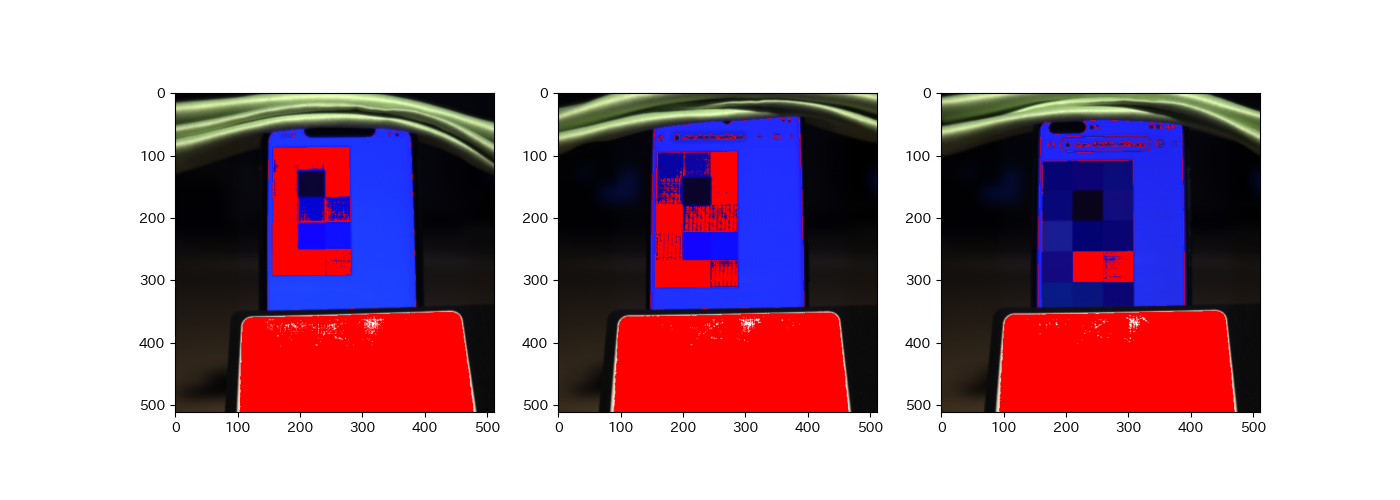

In [12]:
color = (255,0,0)
image_i = Image.open(IMG_PATH_iphone)
std = 0.1
base = 0.971
LOWER = base - std 
UPPER = base + std


for i in range(512):
    for j in range(512):
        blue_i = spec_img_i.read_pixel(511-i,j)[20]
        if LOWER < blue_i and blue_i < UPPER:
            image_i.putpixel((i, j), color)
            
image_p = Image.open(IMG_PATH_pixel)
for i in range(512):
    for j in range(512):
        blue_p = spec_img_p.read_pixel(511-i,j)[20]
        if LOWER < blue_p and blue_p < UPPER:
            image_p.putpixel((i, j), color)
            

image_h = Image.open(IMG_PATH_huawei)
for i in range(512):
    for j in range(512):
        blue_h = spec_img_h.read_pixel(511-i,j)[20]
        if LOWER < blue_h and blue_h < UPPER:
            image_h.putpixel((i, j), color)
            
fig2 = plt.figure(figsize = (14,5))
_ax1 = fig2.add_subplot(1,3,1)
_ax2 = fig2.add_subplot(1,3,2)
_ax3 = fig2.add_subplot(1,3,3)

_ax1.imshow(image_i)
_ax2.imshow(image_p)
_ax3.imshow(image_h)
plt.show()

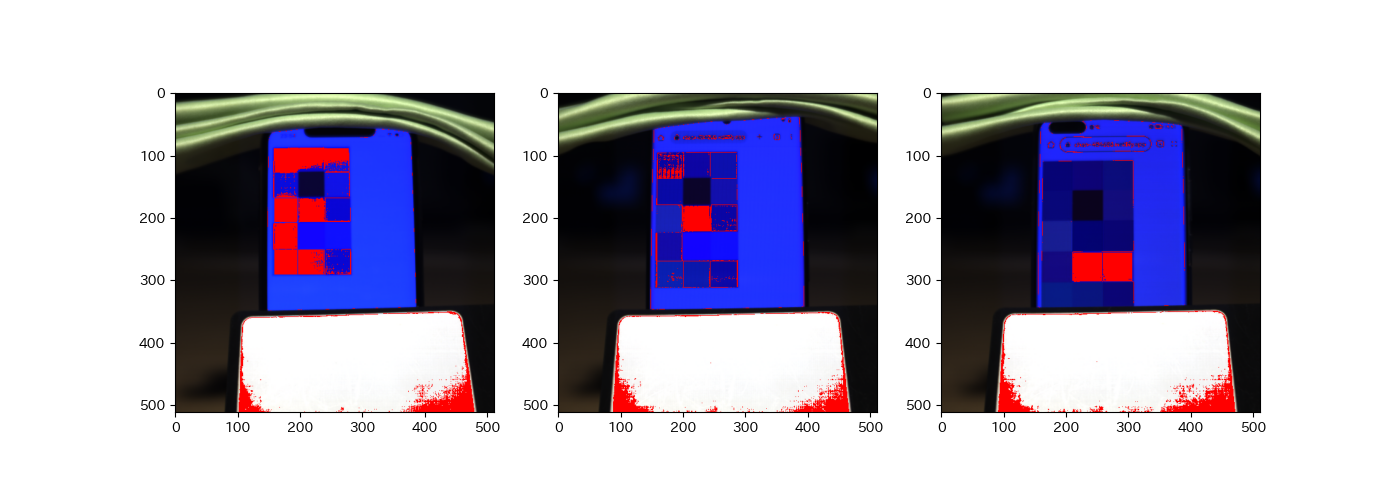

In [22]:
color = (255,0,0)
image_i = Image.open(IMG_PATH_iphone)
std = 0.06
base = 0.889
LOWER = base - std 
UPPER = base + std


for i in range(512):
    for j in range(512):
        correction_value = correction_i_unit(i,j)
        blue_i = spec_img_i.read_pixel(511-i,j)[20]
        blue_i -= correction_value
        if LOWER < blue_i and blue_i < UPPER:
            image_i.putpixel((i, j), color)
            
image_p = Image.open(IMG_PATH_pixel)
for i in range(512):
    for j in range(512):
        correction_value = correction_p(i,j)
        blue_p = spec_img_p.read_pixel(511-i,j)[20]
        blue_p -= correction_value
        if LOWER < blue_p and blue_p < UPPER:
            image_p.putpixel((i, j), color)
            

image_h = Image.open(IMG_PATH_huawei)
for i in range(512):
    for j in range(512):
        correction_value = correction_h(i,j)
        blue_h = spec_img_h.read_pixel(511-i,j)[20]
        blue_h -= correction_value
        if LOWER < blue_h and blue_h < UPPER:
            image_h.putpixel((i, j), color)
            
fig2 = plt.figure(figsize = (14,5))
_ax1 = fig2.add_subplot(1,3,1)
_ax2 = fig2.add_subplot(1,3,2)
_ax3 = fig2.add_subplot(1,3,3)

_ax1.imshow(image_i)
_ax2.imshow(image_p)
_ax3.imshow(image_h)
plt.show()

In [14]:
ex_max_i=argrelmax(y_i,order=3)
ex_max_p = argrelmax(y_p,order=3)
ex_max_h = argrelmax(y_h,order=3)
print(ex_max_i,ex_max_p,ex_max_h)

(array([ 20,  43,  78, 108]),) (array([ 21,  77, 102]),) (array([22, 61, 76]),)


In [15]:
ex_max_i[0][0]

20

In [16]:
for elem in ex_max_i[0]:
    print(y_i[elem])

0.8969072
0.099444725
0.08075734
0.020496225


In [17]:
for i in ex_max_p[0]:
    print(y_p[i])

0.9534342
0.057763062
0.018050542


In [18]:
for i in ex_max_h[0]:
    print(y_h[i])

0.7063741
0.013083451
0.04317549


In [19]:
0.617

0.617

In [20]:
int(60/50)

1